In [10]:
library(tidyverse)
library(ggrepel)
library(stringr)
library(data.table)
library(ggrepel)
library(ggbeeswarm)
library(here)
library(bodkanr)

In [13]:
dir.create("../fig")

In [7]:
# Near East populations to exclude from West Eurasians in plots over time
near_east <- c("BedouinB", "Yemenite_Jew", "Palestinian", "Iraqi_Jew", "Jordanian",
               "Druze", "Iranian", "Samaritan")
ignore_samples <- near_east

# load the estimates
admix_array <- readRDS(here("data/rds/admixture_array_prop.rds")) %>% filter(!X %in% ignore_samples) %>% mutate(stat = "admix_prop")
f4_nea <- readRDS(here("data/rds/f4_nea.rds")) %>% filter(!X %in% ignore_samples)

nea_est_all <- bind_rows(admix_array, f4_nea) %>%
  select(X, stat, alpha, Zscore, snp_count, age, pop, stderr, sites)
nea_est <- nea_est_all %>%
  filter(pop %in% c('EMH', 'WestEurasia'))

In [11]:
# Neandertal ancestry over time -------------------------------------------

plot_nea_time <- function(df, statistic, array, snp_cutoff = 0, ymax = 0.05, title="",
                          statistic.2 = NULL, array.2 = NULL,
                          ret.fit.2 = F) {
  p1 <- filter(df,
         stat == statistic,
         sites == array,
         pop %in% c("EMH", "WestEurasia"),
         snp_count > snp_cutoff) %>% 
    ggplot(aes(age, alpha)) +
    geom_point(aes(size = snp_count/1e6), alpha = 1/2) +
    geom_errorbar(aes(ymin = alpha - 2 * stderr, ymax = alpha + 2 * stderr), alpha = 1/5) +
    geom_smooth(aes(weight = snp_count), method = "lm", linetype = 2, 
                fullrange = TRUE, size = 0.5, color='blue') +
    coord_cartesian(ylim = c(0, ymax)) +
    xlim(46000, 0) +
    xlab("Years before present") + ylab("Neandertal ancestry proportion") +
    ggtitle(title) +
    scale_size('SNP Count\n(million)') + theme_classic()
    # paper_theme(legend.position = "none")
  if (!is.null(statistic.2)) {
    p2 <- filter(df,
                 stat == statistic.2,
                 sites == array.2,
                 pop %in% c("EMH", "WestEurasia"),
                 snp_count > snp_cutoff) %>% 
      geom_smooth(mapping = aes(weight = snp_count), method = "lm", linetype = 3, 
                  fullrange = TRUE, size = 0.5, color='black', se=F)
    if (ret.fit.2) return(p2)
    return(p1+p2)
  }
  return(p1)
}

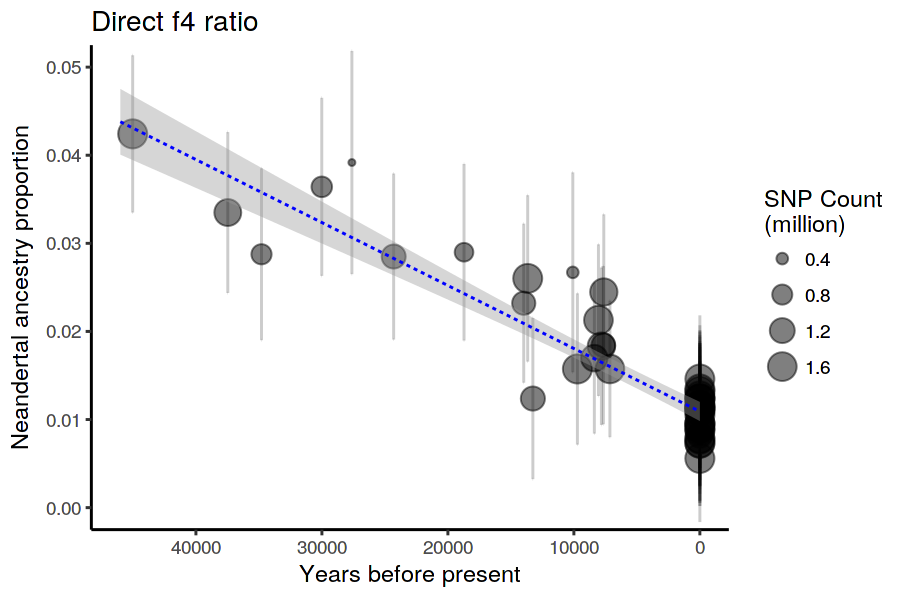

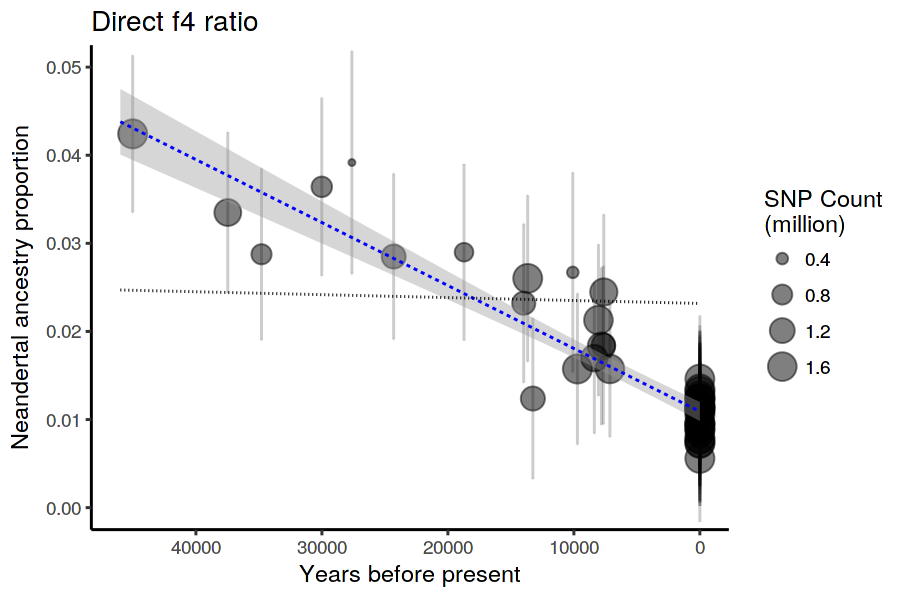

In [12]:
set_dim(6, 4)

plot_nea_time(nea_est, statistic = "indirect_f4", array = "all",
              snp_cutoff = 1000, title = "Direct f4 ratio")
plot_nea_time(nea_est, statistic = "indirect_f4", array = "all",
              statistic.2 = "direct_f4", array.2 = "all",
              snp_cutoff = 1000, title = "Direct f4 ratio")

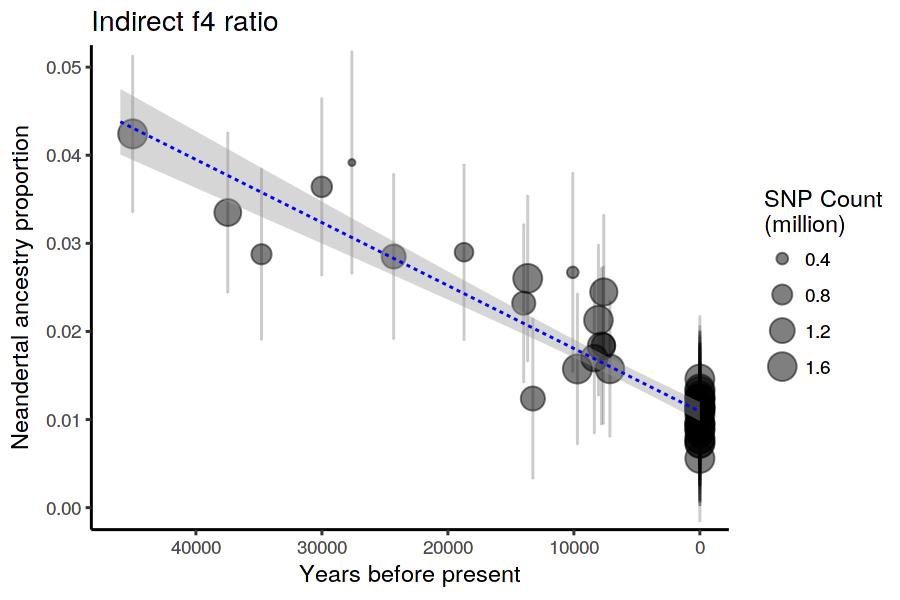

X,stat,alpha,Zscore,snp_count,age,pop,stderr,sites
UstIshim,admix_prop,0.02816946,Inf,157653,45020,EMH,0.000000,admixture_array
UstIshim,direct_f4,0.01680500,2.681,325163,45020,EMH,0.006267,ho_nonafr
UstIshim,indirect_f4,0.03746600,4.273,325163,45020,EMH,0.008767,ho_nonafr
UstIshim,direct_f4,0.03700700,5.867,458848,45020,EMH,0.006308,ho_afr
UstIshim,indirect_f4,0.03259200,7.179,458848,45020,EMH,0.004540,ho_afr
UstIshim,direct_f4,0.02680700,4.902,784011,45020,EMH,0.005469,ho_both
UstIshim,indirect_f4,0.03395200,6.530,784011,45020,EMH,0.005199,ho_both
UstIshim,direct_f4,0.02969700,6.263,518639,45020,EMH,0.004742,bigyri_both
UstIshim,indirect_f4,0.04976700,7.715,518639,45020,EMH,0.006451,bigyri_both
UstIshim,direct_f4,0.03053100,5.578,442926,45020,EMH,0.005474,bigyri_YRI


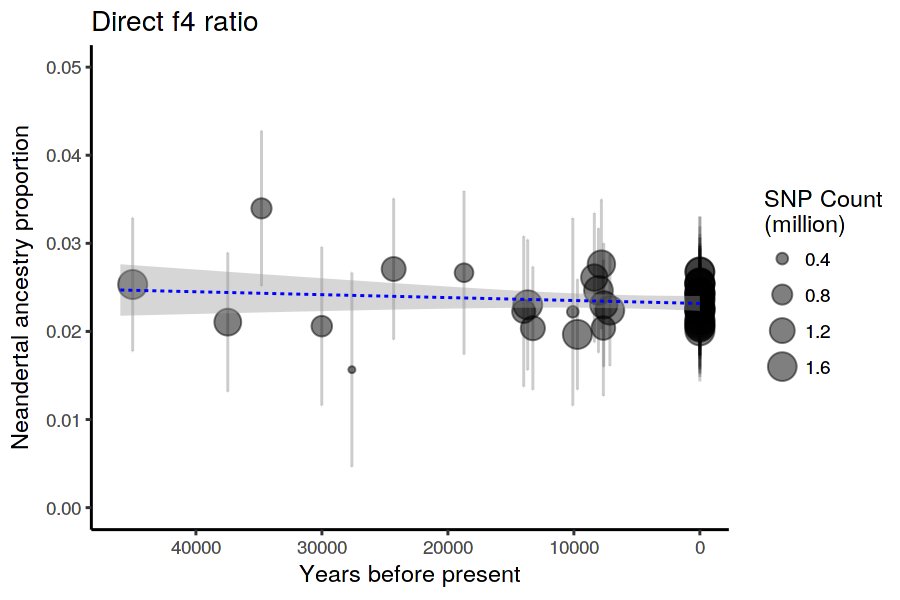

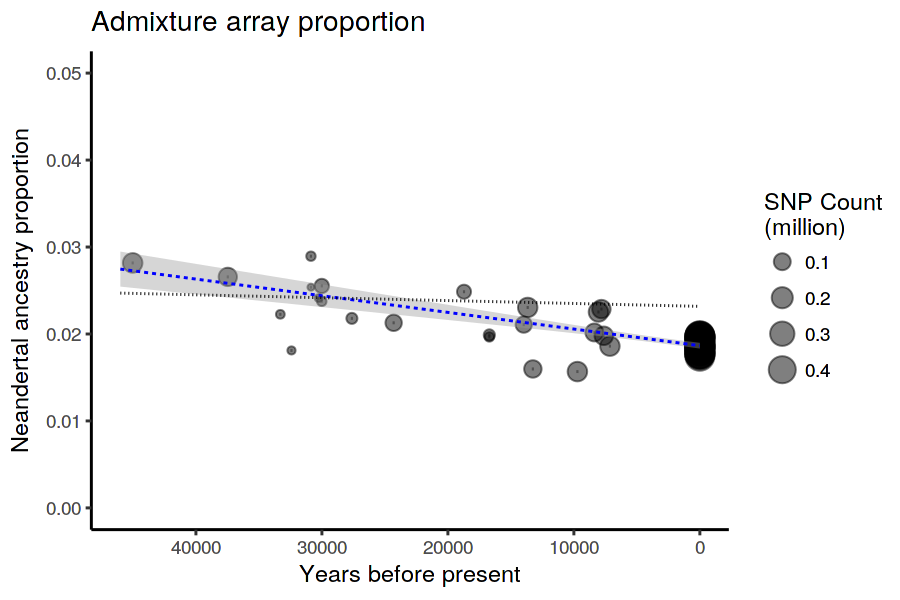

In [15]:
plot_nea_time(nea_est, statistic = "indirect_f4", array = "all",
              snp_cutoff = 1000, title = "Indirect f4 ratio")
ggsave(here("fig/fig1a_indirect_f4.png"), width = 5, height = 3.5, units = 'in')

plot_nea_time(nea_est, statistic = "direct_f4", array = "all",
              snp_cutoff = 1000, title = "Direct f4 ratio")
ggsave(here("fig/fig1b_direct_f4.png"), width = 5, height = 3.5, units = 'in')

nea_est %>% filter(X == 'UstIshim')


plot_nea_time(nea_est, statistic = "admix_prop", array = "admixture_array",
              statistic.2 = "direct_f4", array.2 = "all",
              snp_cutoff = 1000, title = "Admixture array proportion")
ggsave(here("fig/figS1a_admix_array_prop.png"), width = 5, height = 3.5, units = 'in')

## EMH basal Eurasian signal

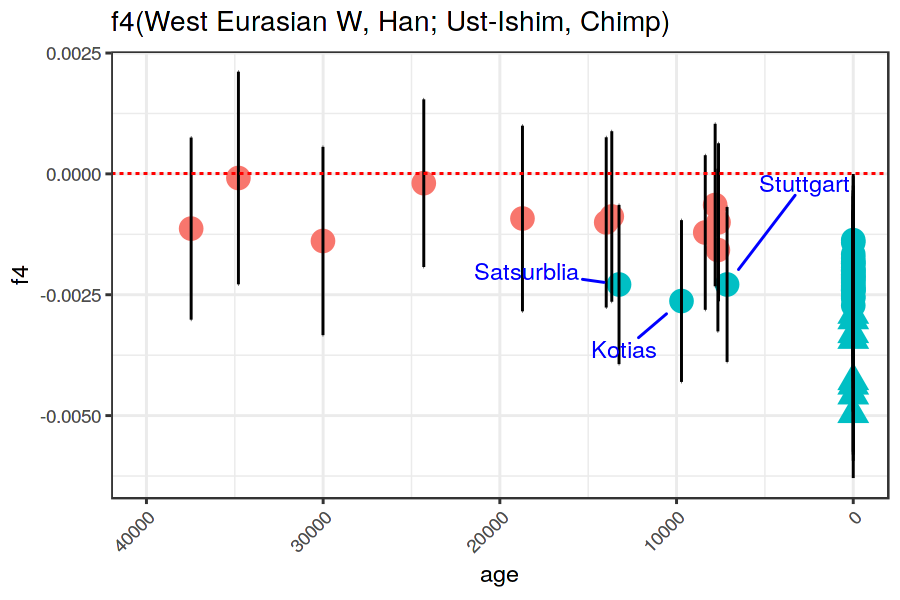

In [18]:
basal_eur <- readRDS(here("data/rds/array_basal_eur.rds"))

basal_eur %>% filter(snp_count > 500000, X == "Han") %>%
mutate(lbl = ifelse(W %in% c("Stuttgart", "Satsurblia", "Kotias"), W, ""),
       X = paste("X =", X)) %>% 
  ggplot(aes(age, f4)) +
  geom_point(aes(shape = W %in% near_east, color = abs(Zscore) > 3), size = 5) +
  geom_errorbar(aes(ymin = f4 - 3 * stderr, ymax = f4 + 3 * stderr)) +
  geom_hline(yintercept = 0, linetype = 2, color = "red") +
  geom_text_repel(aes(label = lbl), box.padding = 0.35, point.padding = 1, color = "blue") +
  ggtitle("f4(West Eurasian W, Han; Ust-Ishim, Chimp)") +
  theme_bw() +
  theme(legend.position = "none", axis.text.x = element_text(hjust = 1, angle = 45)) +
  xlim(40000, 0)
ggsave(here("fig/figS2_basal_eurasian_over_time.png"), width = 8, height = 5, units = 'in')

## Whole-genome basal Eurasian analysis


Call:
lm(formula = alpha ~ f4, data = filter(nea_be, !name %in% near_east))

Residuals:
       Min         1Q     Median         3Q        Max 
-2.171e-03 -5.880e-04  1.439e-05  7.435e-04  2.008e-03 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.018905   0.001351  13.995 2.49e-13 ***
f4          -1.987024   2.089596  -0.951    0.351    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.001125 on 25 degrees of freedom
Multiple R-squared:  0.03491,	Adjusted R-squared:  -0.003697 
F-statistic: 0.9042 on 1 and 25 DF,  p-value: 0.3508



	Welch Two Sample t-test

data:  alpha by group
t = -6.4681, df = 13.849, p-value = 1.557e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.003359868 -0.001685224
sample estimates:
mean in group Near East individuals  mean in group other West Eurasians 
                         0.01765075                          0.02017330 


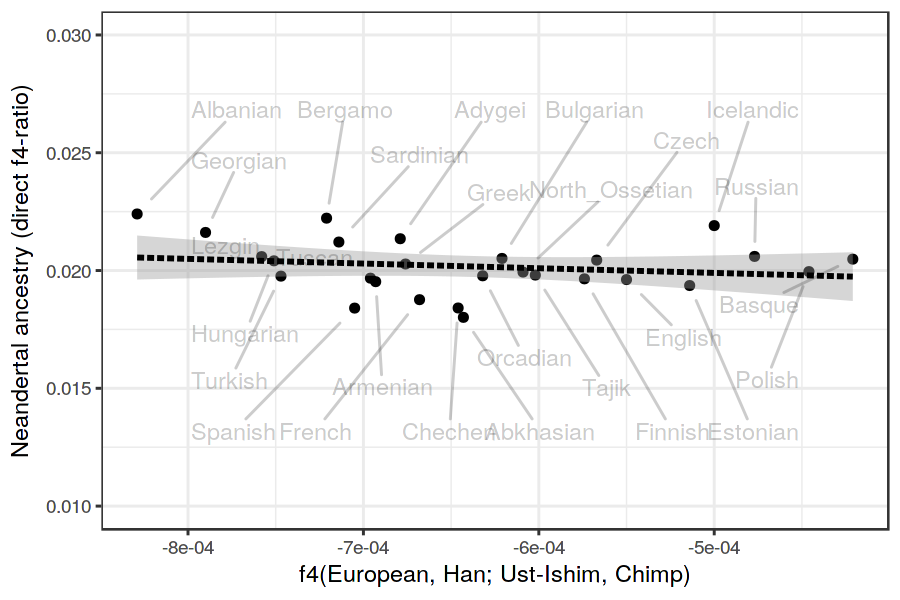


	Welch Two Sample t-test

data:  f4 by group
t = -5.7074, df = 7.8459, p-value = 0.0004837
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.0006895537 -0.0002917241
sample estimates:
mean in group Near East individuals  mean in group other West Eurasians 
                      -0.0011287500                       -0.0006381111 


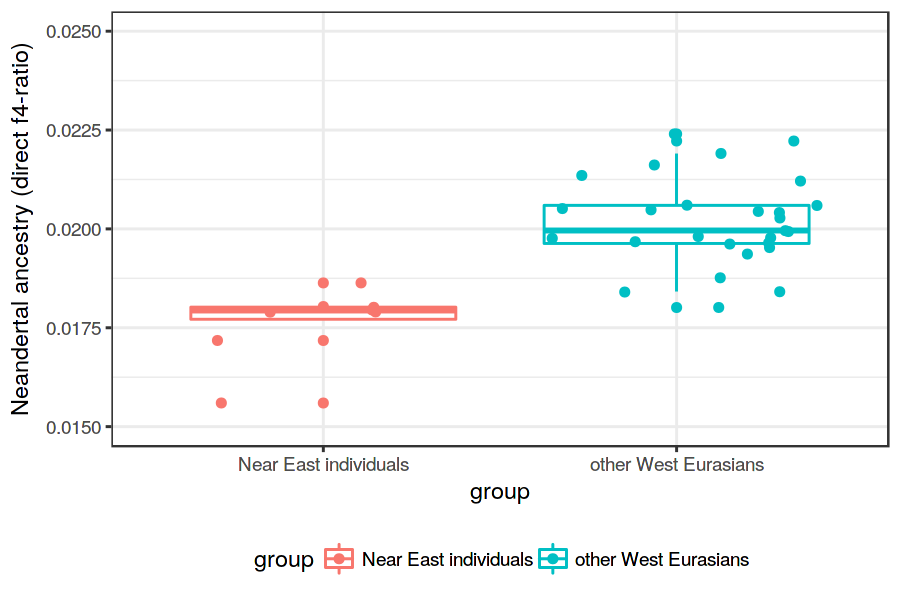

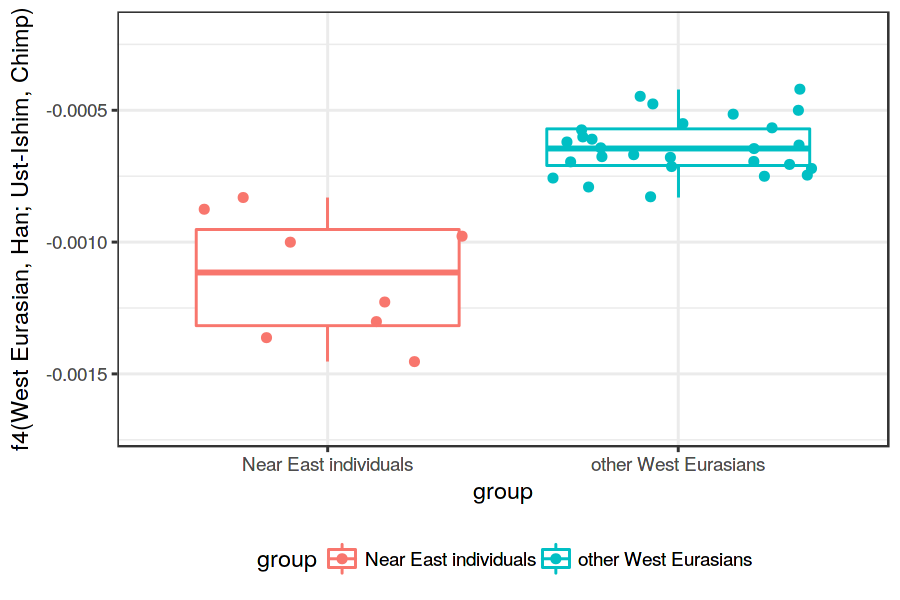

In [19]:
nea_be <- readRDS(here("data/rds/whole_genome_nea_be.rds"))

summary(lm(data = filter(nea_be, !name %in% near_east), alpha ~ f4))
filter(nea_be, !name %in% near_east) %>%
  ggplot(aes(f4, alpha)) +
  geom_point() +
  geom_smooth(method = "lm", linetype = 5, color = "black", aes(group = 1)) +
  geom_text_repel(color = "black", aes(label = name), box.padding = 3, point.padding = 1, alpha = 1/5) +
  theme_bw() + theme(legend.position = "bottom") +
  xlab("f4(European, Han; Ust-Ishim, Chimp)") + ylim(0.01, 0.03) +
  ylab("Neandertal ancestry (direct f4-ratio)") +
ggsave(here("fig/figS3_basal_eurasian_vs_nea_europe.png"), width = 8, height = 5, units = 'in')

t.test(alpha ~ group, nea_be)
ggplot(nea_be, aes(group, alpha, color = group)) +
  geom_boxplot() + geom_jitter() +
  theme_bw() + theme(legend.position = "bottom") +
  ylab("Neandertal ancestry (direct f4-ratio)") +
  ylim(0.015, 0.025)
ggsave(here("fig/figS4a_be_neareast_vs_europe.png"), width = 8, height = 5, units = 'in')

t.test(f4 ~ group, nea_be)
ggplot(nea_be, aes(group, f4, color = group)) +
  geom_boxplot() + geom_jitter() +
  theme_bw() + theme(legend.position = "bottom") +
  ylab("f4(West Eurasian, Han; Ust-Ishim, Chimp)") +
  ylim(-0.0017, -0.0002)
ggsave(here("fig/figS4b_nea_neareast_vs_europe.png"), width = 8, height = 5, units = 'in')

## Affinities over time to different SGDP populations

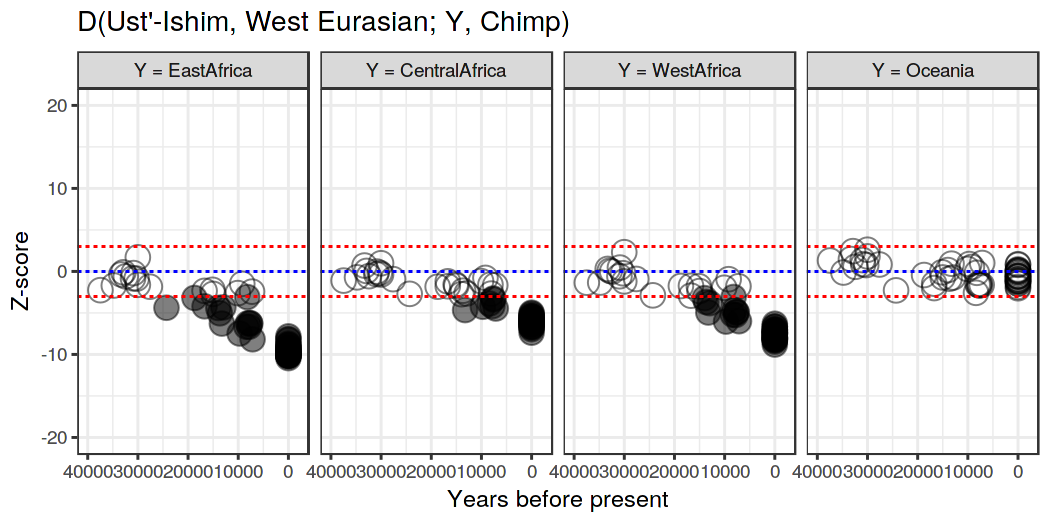

In [24]:
sgdp_affinities <- readRDS(here("data/rds/sgdp_affinities_ui_chimp.rds"))

set_dim(7, 3.5)

sgdp_affinities %>% 
  filter(Y %in% c("EastAfrica", "CentralAfrica", "WestAfrica", "Oceania"), 
         n_snps > 50000) %>%
  mutate(Y = paste("Y =", Y)) %>% 
  mutate(Y = factor(Y, levels = c("Y = EastAfrica", "Y = CentralAfrica", "Y = WestAfrica", "Y = Oceania"))) %>%
  ggplot(aes(age, Zscore)) + geom_point(aes(shape = abs(Zscore) > 3), size = 5, alpha = 1/2) +
  geom_hline(yintercept = 0, linetype = 2, color = "blue") +
  geom_hline(yintercept = c(-3, 3), linetype = 2, color = "red") +
  xlim(40000, -2000) + ylim(-20, 20) +
  facet_grid(. ~ Y) +
  xlab("Years before present") + ylab("Z-score") +
  ggtitle("D(Ust'-Ishim, West Eurasian; Y, Chimp)") +
  scale_shape_manual(values = c(21, 19)) +
  theme_bw() + theme(legend.position = "none")
ggsave(here("fig/fig2_african_affinities_ui_chimp_oceania.png"),
       width = 7, height = 3.5, units = 'in')

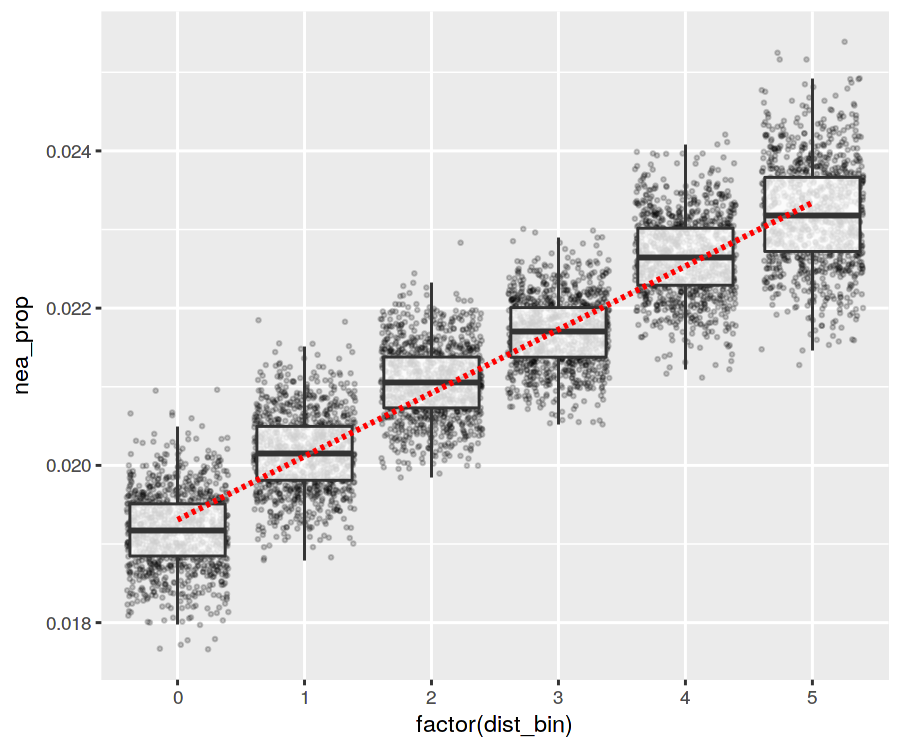

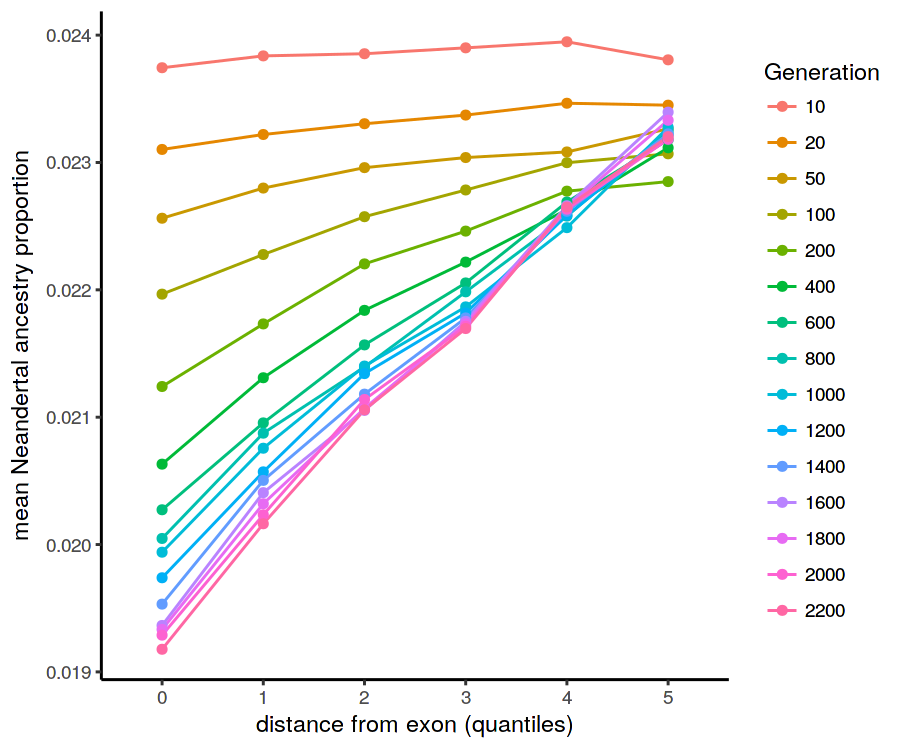

In [26]:
bin_props <- readRDS(here("data/rds/depletion_near_genes.rds"))

set_dim(6, 5)

bin_props %>% filter(gen == 2200) %>% 
  ggplot(aes(factor(dist_bin), nea_prop)) +
  geom_jitter(alpha = 1/5, size = 0.5) +
  geom_boxplot(alpha = 0.8, outlier.shape = NA) +
  geom_smooth(aes(group = 1), method = "lm", linetype = 2, color = "red")

bin_props %>%
  group_by(dist_bin, gen) %>%
  summarise(nea_prop = mean(nea_prop)) %>% 
ggplot(aes(x=dist_bin, y=nea_prop, group=gen, color=as.factor(gen))) +
  geom_line() + 
  geom_point() +
  theme_classic() +
  xlab('distance from exon (quantiles)') +
  ylab('mean Neandertal ancestry proportion') +
  scale_color_discrete(name = "Generation")
ggsave(here("fig/fig3c_depletion_near_exons.png"), width = 6, height = 5, units = 'in')

## Deltas of allele frequencies

In [29]:
deltas <- readRDS(here("data/rds/mutation_deltas.rds"))

`geom_smooth()` using method = 'loess'


`geom_smooth()` using method = 'loess'


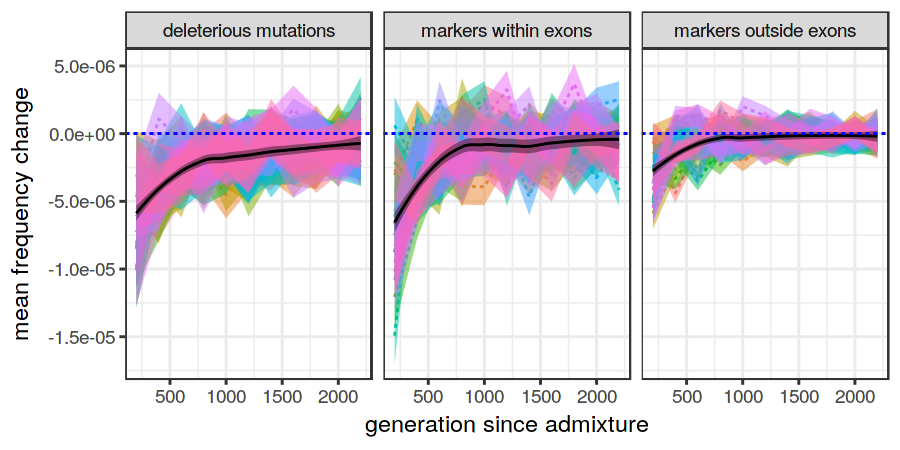

In [31]:
set_dim(6, 3)

group_by(deltas, g, mut_type, rep) %>%    
  summarise(avg_delta=mean(delta_f), sd_delta=sd(delta_f), n_delta=n()) %>%
  mutate(se_delta=sd_delta / sqrt(n_delta),
         lower_ci=avg_delta - qt(1 - (0.05 / 2), n_delta - 1) * se_delta,
         upper_ci=avg_delta + qt(1 - (0.05 / 2), n_delta - 1) * se_delta) %>% 
  filter(g >= 200) %>% 
  ungroup %>% 
  filter(mut_type %in% c("gap_marker", "region_marker", "Nea_del")) %>% 
  mutate(mut_type=str_replace(mut_type, "MH_del", "MH deleterious") %>%
           str_replace("Nea_del", "deleterious mutations") %>%
           str_replace("gap_marker", "markers outside exons") %>% 
           str_replace("region_marker", "markers within exons")) %>% 
  mutate(mut_type = factor(mut_type, levels = c("deleterious mutations",
                                                "markers within exons",
                                                "markers outside exons"))) %>% 
ggplot(aes(g, avg_delta)) +
  geom_line(aes(color=rep), linetype = 2, size = 0.5) +
  geom_ribbon(aes(g, ymin=lower_ci, ymax=upper_ci, fill=rep), alpha=1/2) +
  geom_smooth(fill="black", color = "black", size = 0.5, se = TRUE) + 
  geom_hline(yintercept=0, linetype=2, color = "blue") +
  facet_grid(. ~ mut_type) + 
  xlab("generation since admixture") + ylab("mean frequency change") +
  theme_bw() +
  theme(legend.position="none")
ggsave(here("fig/fig3d_mutation_deltas.png"), width = 6, height = 3, units = 'in')

In [28]:
# 
# deserts <- readRDS("data/rds/desert_sizes.rds")
# 
# deserts %>% filter(gen == 2200, size > 2e6) %>% mutate(rep = factor(rep)) %>%
#   ggplot(aes(rep, size / 1e6, color = factor(rep))) +
#   geom_quasirandom(alpha=1/2) +
#   xlab("independent simulation replicate") + ylab("desert size [Mb]") +
#   facet_grid(. ~ selection) +
#   theme_bw() +
#   theme(legend.position = "none")
# ggsave("fig/figS5_deserts.png", width = 8, height = 3, units = 'in')
# 

In [32]:
mutations <- readRDS(here("data/rds/mutations.rds"))

mutations$mut_type %>% table

mutation_traj <- mutations %>%
  filter(mut_type %in% c("gap_marker", "region_marker")) %>% 
  group_by(gen, rep, mut_type) %>%
  summarise(avg_nea=mean(freq)) %>%
  group_by(gen, mut_type) %>%
  summarise(mean_rep=mean(avg_nea), sd_rep=sd(avg_nea), n_rep=n()) %>%
  mutate(se_rep=sd_rep / sqrt(n_rep),
         lower_ci=mean_rep - qt(1 - (0.05 / 2), n_rep - 1) * se_rep,
         upper_ci=mean_rep + qt(1 - (0.05 / 2), n_rep - 1) * se_rep)

.
   gap_marker        MH_del       Nea_del region_marker 
     23976434      21439290       2581771       6263588 

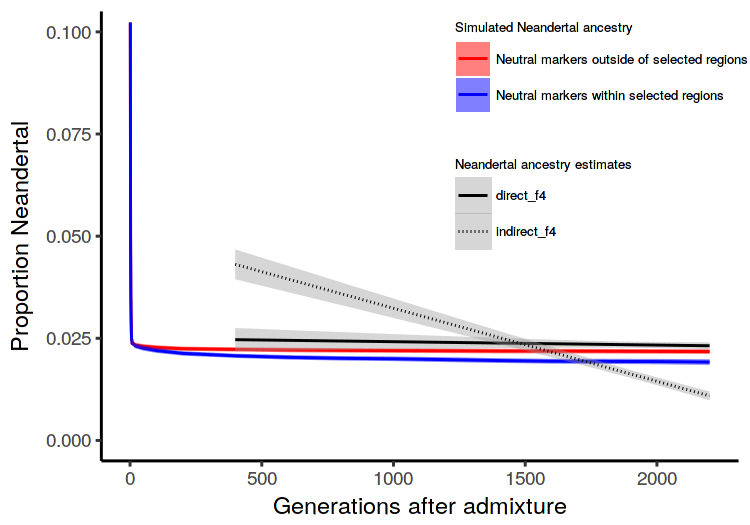

In [34]:
set_dim(5, 3.5)

p1 <- ggplot(mutation_traj, aes(gen, mean_rep)) +
  geom_line(size = 0.5, aes(color=mut_type, group = mut_type)) +
  geom_ribbon(aes(ymin=lower_ci, ymax=upper_ci, color=mut_type, group = mut_type, fill = mut_type), color = NA, alpha=1/2) +
  xlab("Generations after admixture") + ylab("Proportion Neandertal") +
  coord_cartesian(y=c(0, 0.1))

both_f4 <- filter(nea_est,
                 stat %in% c('indirect_f4', 'direct_f4'),
                 sites == 'all',
                 pop %in% c("EMH", "WestEurasia"),
                 snp_count > 1000) %>%
  mutate(gen = 2200 - age/25)

p1a <- geom_smooth(data=both_f4, 
                   mapping=aes(x = gen, y = alpha, weight=snp_count, lty=stat), inherit.aes = FALSE,
              method='lm', color='black', size=.5)

p1+p1a + theme_classic() +
  theme(legend.position = c(1,1), legend.justification = c(1,1), 
        legend.text = element_text(size=6), 
        legend.title = element_text(size=6)) +
  scale_color_manual('Simulated Neandertal ancestry',
                     values = c('red', 'blue'),
                     labels= c('Neutral markers outside of selected regions', 
                              'Neutral markers within selected regions')) +
  scale_fill_manual('Simulated Neandertal ancestry',
                     values = c('red', 'blue'),
                     labels= c('Neutral markers outside of selected regions', 
                               'Neutral markers within selected regions')) +
scale_linetype_manual('Neandertal ancestry estimates',
                   values = c(1, 3))
ggsave(here('fig/fig3b_neandertal_simulations_vs_f4.png'), width = 5, height = 3.5)

In [36]:
direct_f4 <- filter(both_f4, stat == "direct_f4")
indirect_f4 <- filter(both_f4, stat == "indirect_f4")
slim_nea <- filter(mutation_traj, mut_type == "gap_marker", gen >= min(both_f4$gen))

direct_lm <- lm(alpha ~ gen, direct_f4)
indirect_lm <- lm(alpha ~ gen, indirect_f4)
slim_lm <- lm(mean_rep ~ gen, slim_nea)

library(Metrics)

sample_ages <- direct_f4$gen

pred_direct <- predict(direct_lm, data.frame(gen=sample_ages))
pred_indirect <- predict(indirect_lm, data.frame(gen=sample_ages))
pred_slim <- predict(slim_lm, data.frame(gen=sample_ages))

In [37]:
(direct_rmse <- rmse(pred_slim, pred_direct))
(indirect_rmse <- rmse(pred_slim, pred_indirect))

indirect_rmse / direct_rmse

[1] 0.0015513

[1] 0.009958187

[1] 6.419251